In [338]:
import numpy as np
import matplotlib.pyplot as plt

In [339]:
def Function(x):
    #return 5*(1-np.exp(-x)) - x
    return 0.5*(5*x**3 - 3*x)

In [340]:
x = np.linspace(-1,1,50)
y = Function(x)

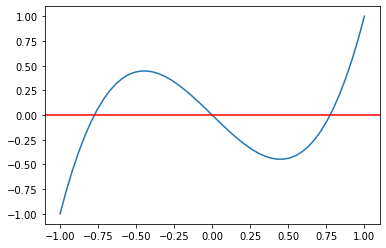

In [341]:
plt.plot(x,y)
plt.axhline(y = 0,color='r')

In [342]:
def Derivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [343]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
        
   # print('Raiz',xn,it)
    
    if it == itmax:
        return Flase
    else:
        return xn

In [344]:
root = GetNewtonMethod(Function,Derivative,1.)
root

0.7745966692414834

In [345]:
def GetAllRoots(x, tolerancia=10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

In [346]:
x = np.linspace(-1.,1.,20)
Roots = GetAllRoots(x)

In [347]:
# Comparando con el valor exacto, mantiza de 10 cifras
print(Roots[0],np.sqrt(3/5))

-0.7745966692 0.7745966692414834


# Comportamiento del algoritmo sin atractores

## Dado que la sucesión no converge, se establece un número definido de iteraciones para cada trayectoria

In [348]:
def GetNewtonMethod1(f,df,xn,N=20): # Numero de terminos de la sucesión
    
    S = np.zeros(N)
    S[0] = xn
    
    for i in range(1,N):
        S[i] = S[i-1] - f(S[i-1])/df( f, S[i-1] )
    
    return S

In [367]:
def TestF(x):
    return x**2 + 9

In [381]:
Ns = 10 # Numero puntos de inicio de la sucesión
Nc = 50 # Numero de iteraciones del método

Sources = np.linspace(10.,10.5,Ns)
Secuencias = np.zeros((Nc,Ns))

for i in range(Ns):
    Secuencias[:,i] =  GetNewtonMethod1(TestF,Derivative,Sources[i],Nc)

In [382]:
Secuencias[:,1]

array([ 1.00555556e+01,  4.58026396e+00,  1.30765585e+00, -2.78744447e+00,
        2.20659695e-01, -2.02830637e+01, -9.91967189e+00, -4.50619190e+00,
       -1.25447004e+00,  2.95993714e+00, -4.03339827e-02,  1.11548284e+02,
        5.57338008e+01,  2.77861594e+01,  1.37311286e+01,  6.53784176e+00,
        2.58062034e+00, -4.53456600e-01,  9.69704389e+00,  4.38446299e+00,
        1.16588003e+00, -3.27680530e+00, -2.65113852e-01,  1.68412827e+01,
        8.15344079e+00,  3.52480616e+00,  4.85737134e-01, -9.02140152e+00,
       -4.01188691e+00, -8.84276741e-01,  4.64676625e+00,  1.35496773e+00,
       -2.64362845e+00,  3.80391699e-01, -1.16397153e+01, -5.43325025e+00,
       -1.88839160e+00,  1.43878451e+00, -2.40824775e+00,  6.64454632e-01,
       -6.44024410e+00, -2.52139077e+00,  5.24033920e-01, -8.32521341e+00,
       -3.62208002e+00, -5.68659949e-01,  7.62901088e+00,  3.22465178e+00,
        2.16826369e-01, -2.06455202e+01])

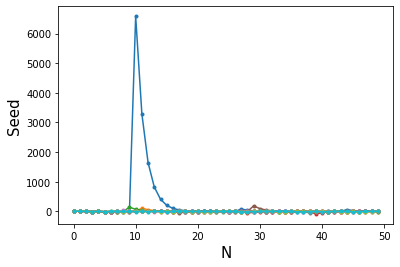

In [383]:
plt.plot(Secuencias,'.-')
plt.xlabel('N',fontsize=15)
plt.ylabel('Seed',fontsize=15)
plt.show()

Text(0, 0.5, 'Root')

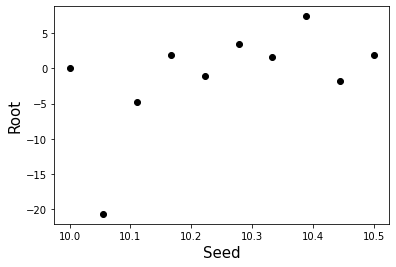

In [384]:
# Luego de N iteraciones cada secuencia llega a un lugar diferente
plt.scatter(Sources,Secuencias[-1,:],color='k',marker='o')
plt.xlabel('Seed', fontsize=15)
plt.ylabel('Root', fontsize=15)